In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Overview

The expericent was conducted at Fermilab in searching for neutrino oscillations.

The model should be able to classify neutrino particles as:
 - Electron (signal, 1)
 - Muon (background, 0)
 
We will be comparing the out-of-sample (i.e. test set) performance of a Random Forest and a Neural Network classifier.

# Import Data

In [11]:
from pathlib import Path

In [16]:
from miniboone_ml.src.data import make_dataset as md

In [27]:
df = md.import_data(Path("../data/external/MiniBooNE_PID.txt"))

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [29]:
# Rename columns
columns_names = md.get_column_names(df)
df.rename(columns = lambda x : columns_names[x], inplace = True)

In [30]:
df.head()

,PID_1,PID_2,PID_3,PID_4,PID_5,PID_6,PID_7,PID_8,PID_9,PID_10,...,PID_41,PID_42,PID_43,PID_44,PID_45,PID_46,PID_47,PID_48,PID_49,PID_50
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [31]:
num_electron, num_muon = md.get_num_neutrinos(Path("../data/external/MiniBooNE_PID.txt"))

In [70]:
print("Number of electrons: {0:,}\nNumbner of muons: {1:,}".format(num_electron, num_muon))

Number of electrons: 36,499
Numbner of muons: 93,565


In [81]:
df = md.add_target_column(df, num_electron, num_muon)

In [80]:
df.drop('target', axis=1, inplace=True)

In [83]:
df.head()

,PID_1,PID_2,PID_3,PID_4,PID_5,PID_6,PID_7,PID_8,PID_9,PID_10,...,PID_42,PID_43,PID_44,PID_45,PID_46,PID_47,PID_48,PID_49,PID_50,target
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130064 entries, 0 to 130063
Data columns (total 51 columns):
PID_1     130064 non-null float64
PID_2     130064 non-null float64
PID_3     130064 non-null float64
PID_4     130064 non-null float64
PID_5     130064 non-null float64
PID_6     130064 non-null float64
PID_7     130064 non-null float64
PID_8     130064 non-null float64
PID_9     130064 non-null float64
PID_10    130064 non-null float64
PID_11    130064 non-null float64
PID_12    130064 non-null float64
PID_13    130064 non-null float64
PID_14    130064 non-null float64
PID_15    130064 non-null float64
PID_16    130064 non-null float64
PID_17    130064 non-null float64
PID_18    130064 non-null float64
PID_19    130064 non-null float64
PID_20    130064 non-null float64
PID_21    130064 non-null float64
PID_22    130064 non-null float64
PID_23    130064 non-null float64
PID_24    130064 non-null float64
PID_25    130064 non-null float64
PID_26    130064 non-null float64
PID_2

In [84]:
from miniboone_ml.src.visualization import visualize as viz

In [390]:
viz.pretty_describe(df)

,count,mean,std,min,10%,25%,50%,75%,90%,max
PID_1,"130,064.000",1.252,60.120,-999.000,3.358,4.013,4.788,5.628,6.386,17.057
PID_2,"130,064.000",-2.108,59.913,-999.000,0.489,0.876,1.382,1.948,2.511,8.803
PID_3,"130,064.000",123.795,196.011,-999.000,16.770,49.295,106.136,138.849,196.829,"4,747.670"
PID_4,"130,064.000",-3.313,59.835,-999.000,0.219,0.242,0.272,0.315,0.362,0.737
PID_5,"130,064.000",-3.585,59.818,-999.000,0.000,0.000,0.005,0.013,0.025,0.179
PID_6,"130,064.000",-3.434,59.827,-999.000,0.000,0.085,0.141,0.213,0.348,0.704
PID_7,"130,064.000",-2.628,59.877,-999.000,0.569,0.715,0.923,1.180,1.424,6.241
PID_8,"130,064.000",-2.774,59.867,-999.000,0.735,0.783,0.834,0.874,0.901,0.990
PID_9,"130,064.000",-0.156,60.025,-999.000,3.161,3.285,3.427,3.585,3.755,7.170
PID_10,"130,064.000",-3.421,59.828,-999.000,0.120,0.143,0.171,0.200,0.230,0.525


# Data Pre-Processing

In [94]:
from miniboone_ml.src.data import preprocessing

In [107]:
# Train/Test split
tr, te = preprocessing.train_test_stratified_split(df=df,
                                                   target='target',
                                                   test_size=0.2,
                                                   random_state=42)

Training set size: 104,051
Test set size: 26,013


In [108]:
tr.head()

,PID_1,PID_2,PID_3,PID_4,PID_5,PID_6,PID_7,PID_8,PID_9,PID_10,...,PID_42,PID_43,PID_44,PID_45,PID_46,PID_47,PID_48,PID_49,PID_50,target
77123,6.03816,0.896687,49.0690,0.222566,0.010309,0.181529,1.011980,0.740547,3.62303,0.205954,...,-75.4365,-0.311327,15.81250,0.148748,0.312210,-3.319600,4.21003,0.931813,0.176821,0
72151,5.77391,1.829440,134.4870,0.360655,0.004866,0.144070,0.860974,0.837051,3.31444,0.171381,...,-48.1724,1.030540,7.63095,0.000000,0.236221,-0.383334,2.85120,1.089330,0.199093,0
114434,4.75171,2.855140,30.2524,0.303063,0.000000,0.016430,0.775962,0.697463,3.17908,0.160415,...,-16.3072,0.850044,2.81757,0.000000,0.155105,0.446280,8.88321,1.766660,0.362892,0
51797,5.65324,1.330120,98.4080,0.331628,0.000000,0.154544,0.767144,0.861814,3.24334,0.200865,...,-18.8086,0.780023,5.12805,0.000000,0.159206,0.129452,3.43628,1.861810,0.156294,0
18964,6.27460,0.590436,317.9210,0.206096,0.065554,0.147159,1.364270,0.858800,3.94942,0.125982,...,-114.1540,-0.703854,35.66360,0.151371,0.345276,-4.801410,1.04013,0.346961,0.135878,1


In [109]:
te.head()

,PID_1,PID_2,PID_3,PID_4,PID_5,PID_6,PID_7,PID_8,PID_9,PID_10,...,PID_42,PID_43,PID_44,PID_45,PID_46,PID_47,PID_48,PID_49,PID_50,target
41280,6.10449,3.01404,54.744,0.268960,0.000000,0.209840,0.441349,0.733103,3.77155,0.129145,...,-27.56700,0.926436,9.30181,0.009709,0.378249,-0.603040,5.22581,5.22207,0.276978,0
87120,5.76793,2.49336,127.411,0.295135,0.023981,0.052872,0.652366,0.716619,3.85440,0.167363,...,-46.34790,0.019669,16.63530,0.019185,0.200576,-0.900994,3.77733,3.09090,0.261782,0
123782,4.28501,1.04153,130.159,0.259182,0.011869,0.126784,0.766086,0.792867,3.31075,0.200812,...,3.51812,-0.024209,3.89646,0.000000,0.105930,0.305190,2.21422,1.33556,0.282210,0
111553,5.42269,2.03177,119.095,0.385580,0.000000,0.175917,0.671952,0.838499,3.36618,0.141043,...,-40.48060,2.239810,7.99695,0.000000,0.204154,-0.212361,2.02491,3.21310,0.276577,0
36728,7.50649,2.67148,60.956,0.312372,0.016026,0.098686,1.328770,0.737576,3.94554,0.277984,...,-20.70410,2.357960,11.88500,0.131410,0.482940,-6.175320,2.20068,2.51897,0.133771,0


In [150]:
# X/y split of training set
tr_X, tr_y = preprocessing.x_y_split(df=tr,
                                     y_col='target')

Class ratio: 0.28062


In [151]:
# X/y split of test set
te_X, te_y = preprocessing.x_y_split(df=te,
                                     y_col='target')

Class ratio: 0.28063


## *PCA*

We want to create another set of training and test data, with reduced dimensionality. We will test if this reduced dimensionality will improve our model results/runtime.

In [152]:
from sklearn.decomposition import PCA

Since PCA relies on variables being in the same scale. For standardization, we will be using RobustScaler, since it's less sensitive to outliers.

We will use PyOD to identify outliers. Specifically, we will use the k-Nearest Neighbour detector. [Source code](https://github.com/yzhao062/pyod/blob/master/pyod/models/knn.py)

In [303]:
tr_X_removed_outliers, tr_y_removed_outliers = preprocessing.remove_outliers_knn(x=tr_X, y=tr_y, contamination=0.05)

5.00% among 104,051 sample points are identified and removed as outliers


In [388]:
viz.pretty_describe(tr_X_removed_outliers)

,count,mean,std,min,10%,25%,50%,75%,90%,max
PID_1,"98,848.000",1.053,61.972,-999.000,3.409,4.062,4.816,5.646,6.392,17.057
PID_2,"98,848.000",-2.283,61.760,-999.000,0.576,0.947,1.427,1.981,2.538,8.606
PID_3,"98,848.000",104.047,120.060,-999.000,16.222,47.204,103.797,135.202,170.475,"1,587.080"
PID_4,"98,848.000",-3.538,61.677,-999.000,0.219,0.242,0.273,0.316,0.362,0.713
PID_5,"98,848.000",-3.812,61.660,-999.000,0.000,0.000,0.005,0.012,0.023,0.179
PID_6,"98,848.000",-3.659,61.669,-999.000,0.000,0.089,0.142,0.213,0.350,0.704
PID_7,"98,848.000",-2.860,61.720,-999.000,0.564,0.708,0.915,1.174,1.423,5.979
PID_8,"98,848.000",-3.002,61.710,-999.000,0.734,0.781,0.831,0.871,0.897,0.967
PID_9,"98,848.000",-0.377,61.873,-999.000,3.171,3.290,3.430,3.587,3.755,7.170
PID_10,"98,848.000",-3.647,61.670,-999.000,0.120,0.143,0.171,0.201,0.231,0.525


In [362]:
from sklearn.pipeline import Pipeline

In [305]:
from sklearn.preprocessing import RobustScaler

In [365]:
pca_pipeline = Pipeline(
    [('standardize', RobustScaler(quantile_range = (0.1, 0.9))),
     ('pca', PCA(n_components=0.99, random_state=42))]
)

In [393]:
np.sum(pca_pipeline.named_steps['pca'].explained_variance_ratio_)

0.9930430055202522

In [368]:
tr_X_pca = pca_pipeline.fit_transform(tr_X_removed_outliers)
tr_y_pca = tr_y_removed_outliers

In [367]:
tr_X_pca.shape

(98848, 6)

In [384]:
column_names_pca = ["z{0}".format(i+1) for i in range(tr_X_pca.shape[1])]

In [369]:
tr_y_pca.shape

(98848,)

In [385]:
tr_pca = pd.DataFrame(tr_X_pca, columns=column_names_pca)
tr_pca['y'] = pd.Series(tr_y_pca.reset_index()['target'])

In [389]:
viz.pretty_describe(tr_pca)

,count,mean,std,min,10%,25%,50%,75%,90%,max
z1,"98,848.000",-0.000,0.483,-2.378,-0.344,-0.091,0.054,0.143,0.201,6.399
z2,"98,848.000",0.000,0.379,-0.461,-0.260,-0.201,-0.106,0.061,0.362,3.474
z3,"98,848.000",0.000,0.142,-0.494,-0.198,-0.095,0.014,0.106,0.174,0.535
z4,"98,848.000",0.000,0.095,-0.175,-0.101,-0.059,-0.005,0.041,0.086,1.325
z5,"98,848.000",0.000,0.061,-0.276,-0.084,-0.048,0.009,0.042,0.071,0.280
z6,"98,848.000",-0.000,0.043,-0.194,-0.051,-0.028,-0.002,0.026,0.053,0.291
y,"98,848.000",0.258,0.438,0.000,0.000,0.000,0.000,1.000,1.000,1.000


In [383]:
import seaborn as sns

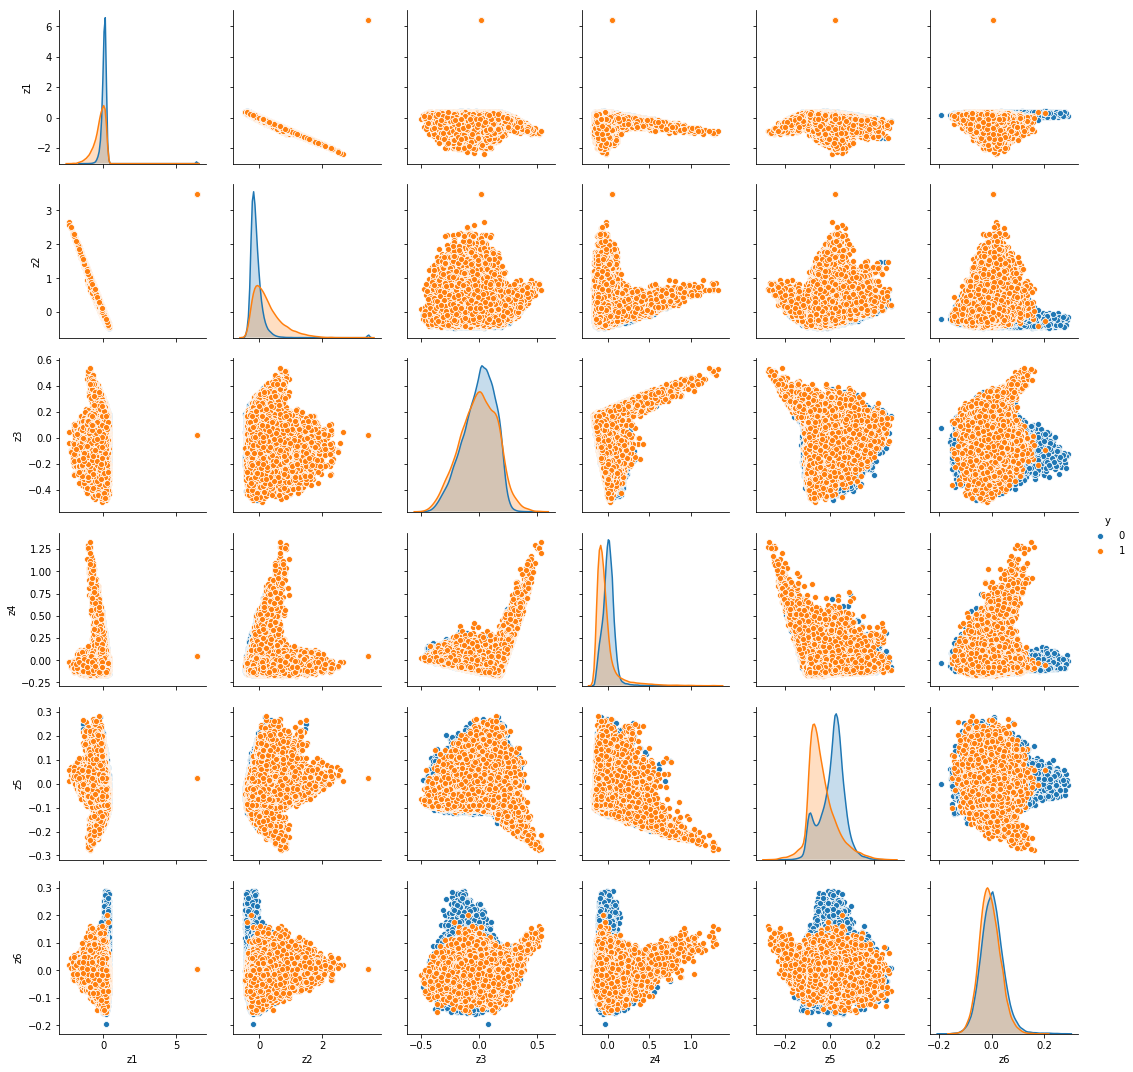

In [387]:
sns.pairplot(tr_pca, vars=column_names_pca, hue='y')

In [409]:
te_X_pca = pca_pipeline.transform(te_X)
te_y_pca = te_y

In [410]:
te_X_pca.shape

(26013, 6)

In [411]:
te_y_pca.value_counts()

0    18713
1     7300
Name: target, dtype: int64

# Trees

First, We will be tune and train the following models using the PCA-reduced training set:

- Random Forest Classifier
- AdaBoost Classifier
- Gradient Boosting Classifier (XGBoost)

The best model will be selected as our champion model against the Neutral Network model

Then, we will tune and train the champion model using the un-reduced training set, see if the performace increase justifies the increase in runtime.

In [397]:
tr_y_pca.value_counts()

0    73337
1    25511
Name: target, dtype: int64

Since the class ratio is not too imblanced (~25%), we will use AUC-ROC score as the key performace metric

In [394]:
import time

In [422]:
import itertools
from scipy import stats
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

## *Preliminary Tuning using Single Decision Tree*

In [488]:
from miniboone_ml.src.models import train_model as tm

## *1. max_depth*

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    2.4s finished


The best parameters: {'max_depth': 8}
The best score: 0.9201448729458755


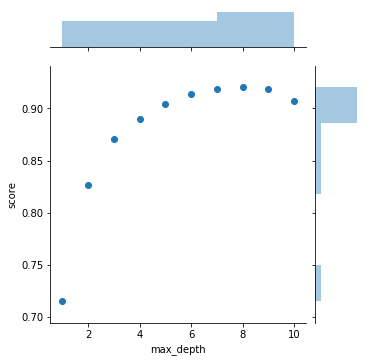

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=2)

In [544]:
tm.evaluate_params(estimator=DecisionTreeClassifier(),
                   cv_method='grid',
                   param_grid={'max_depth' : [i+1 for i in range(10)]},
                   x=tr_X_pca,
                   y=tr_y_pca)

## *2. min_samples_split*

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    5.5s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   25.5s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:   47.8s finished


The best parameters: {'min_samples_split': 0.007475373737373737}
The best score: 0.9270763724675134


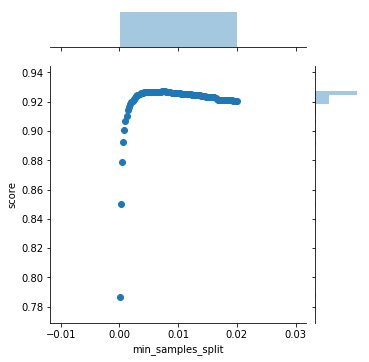

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'min_samples_split': array([1.0000e-06, 2.0301e-04, ..., 1.9798e-02, 2.0000e-02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=2)

In [545]:
tm.evaluate_params(estimator=DecisionTreeClassifier(),
                   cv_method='grid',
                   param_grid={'min_samples_split' : np.linspace(0.000001, 0.02, 100)},
                   x=tr_X_pca,
                   y=tr_y_pca)

## *3. min_samples_leaf*

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:   19.3s
[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:   34.5s finished


The best parameters: {'min_samples_leaf': 0.001617080808080808}
The best score: 0.9301441869544242


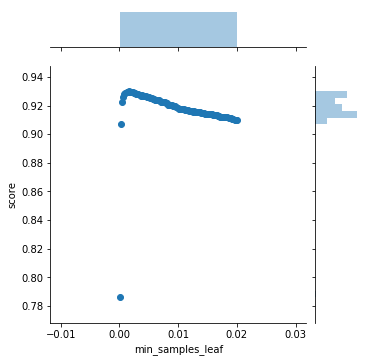

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'min_samples_leaf': array([1.0000e-06, 2.0301e-04, ..., 1.9798e-02, 2.0000e-02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=2)

In [546]:
tm.evaluate_params(estimator=DecisionTreeClassifier(),
                   cv_method='grid',
                   param_grid={'min_samples_leaf' : np.linspace(0.000001, 0.02, 100)},
                   x=tr_X_pca,
                   y=tr_y_pca)

## *4. max_leaf_nodes*

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 120 out of 120 | elapsed:   15.7s finished


The best parameters: {'max_leaf_nodes': 252}
The best score: 0.9250402434320062


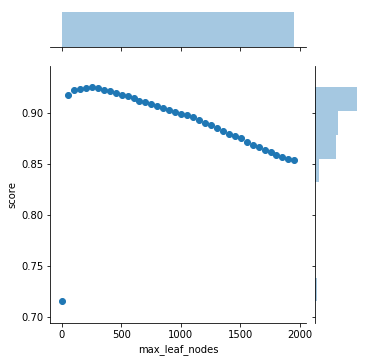

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid={'max_leaf_nodes': [2, 52, 102, 152, 202, 252, 302, 352, 402, 452, 502, 552, 602, 652, 702, 752, 802, 852, 902, 952, 1002, 1052, 1102, 1152, 1202, 1252, 1302, 1352, 1402, 1452, 1502, 1552, 1602, 1652, 1702, 1752, 1802, 1852, 1902, 1952]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='roc_auc', verbose=2)

In [551]:
tm.evaluate_params(estimator=DecisionTreeClassifier(),
                   cv_method='grid',
                   param_grid={'max_leaf_nodes' : [i for i in range(2, 2000, 50)]},
                   x=tr_X_pca,
                   y=tr_y_pca)

Conclusion:
1. `max_depth`: best is around **6-8**
2. `min_sample_split`: best is around **0.008** (or about ~800 samples) 
3. `min_sample_leaf`: best is around **0.0016** (or about ~160 samples)
4. `max_leaf_nodes`: best is around **250**

## *Random Forest Classifier - PCA Reduced*

In [554]:
rfc = RandomForestClassifier()

In [555]:
param_grid_rfc = {'n_estimators' : stats.randint(600, 1000),
                  'max_depth' : [i for i in range(6, 9)],
                  'min_samples_split' : stats.uniform(0.005, 0.011),
                  'min_samples_leaf' : stats.uniform(0.0001, 0.005),
                  'max_leaf_nodes' : stats.randint(200, 300),
                  'max_features' : stats.randint(3, tr_X_pca.shape[1] + 1)}

In [ ]:
rfc_grid = tm.evaluate_params(estimator=rfc,
                              cv_method='randomized',
                              param_grid=param_grid_rfc,
                              x=tr_X_pca,
                              y=tr_y_pca,
                              cv=3,
                              scoring='roc_auc',
                              n_iter=25,
                              verbose=2,
                              n_jobs=6,
                              random_state=123)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
